In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rgroupinterm.pruners import BasePruner, HarmonicMeanTransformer

In [2]:
def get_harmonicmean(df, score_column):
    df_score = df[[x for x in df.columns if score_column in x]]

    pruner = BasePruner([], [HarmonicMeanTransformer()])
    scored_df = pruner(df_score)
    scored_df['Pair'] = df['Pair']
    scored_df['Set'] = df['Set']
    mean = scored_df['score'].mean()
    mean_std = scored_df['score'].std()
    average_max = scored_df.groupby(['Set','Pair']).max()['score'].mean()
    average_max_std = scored_df.groupby(['Set','Pair']).max()['score'].std()

    return mean, mean_std, average_max, average_max_std, scored_df


In [3]:
df = pd.read_csv('data/jacs_scored_new.csv')
df_p = pd.read_csv('data/jacs_score_parents_new.csv')

In [25]:
df.columns

Index(['Intermediate', 'Parent_1', 'Parent_2', 'Pair', 'Set',
       'raw_score_Lomap_0', 'raw_score_Lomap_1', 'raw_score_ROCS_0',
       'raw_score_ROCS_1', 'raw_score_Tanimoto_0', 'raw_score_Tanimoto_1'],
      dtype='object')

In [32]:
scores = ["Lomap", "ROCS", "Tanimoto"]
df_plot = pd.DataFrame(columns=['Parents', 'Intermediate (mean)', 'Intermediate (max)', 'Parents std', 'Intermediate std (mean)', 'Intermediate std (max)'])
for score in scores:
    mean, mean_std, average_max, average_max_std, _ = get_harmonicmean(df, f'raw_score_{score}')
    
    mean_p = df_p.raw_score_Tanimoto_p.mean()
    std_p = df_p.raw_score_Tanimoto_p.std()

    df_plot.loc[len(df_plot.index)] = [mean_p, mean, average_max, std_p, mean_std, average_max_std]

/zfsdata/data/linde/RGroupInterm/rgroupinterm/pruners.py:423: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 2 * (scores[0]**self.exponent * scores[1]**self.exponent) / (
/zfsdata/data/linde/RGroupInterm/rgroupinterm/pruners.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scores[0]**self.exponent + scores[1]**self.exponent)
/zfsdata/data/linde/RGroupInterm/rgroupinterm/pruners.py:423: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

In [15]:
df_plot 

,Parents,Intermediate (mean),Intermediate (max),Parents std,Intermediate std (mean),Intermediate std (max)
0,0.426984,0.475385,0.505764,0.09602,0.232050,0.262481
1,0.426984,0.817999,0.855480,0.09602,0.104228,0.078894
2,0.426984,0.528417,0.579359,0.09602,0.080294,0.058912


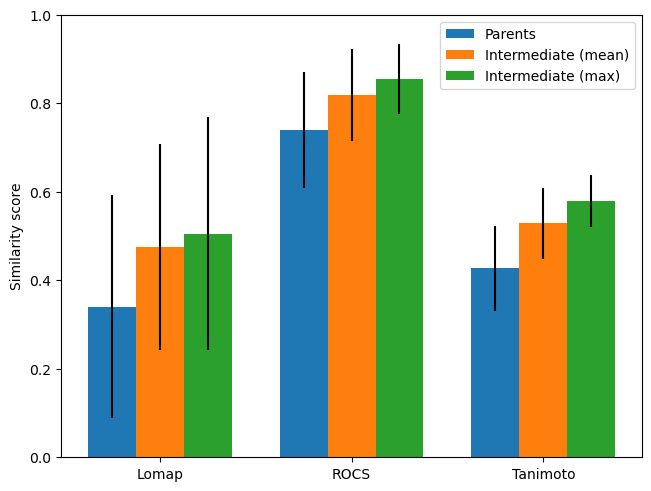

In [18]:
fig, ax = plt.subplots(layout='constrained')

x = np.arange(len(scores))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for values, stds in [('Parents', 'Parents std'), ('Intermediate (mean)', 'Intermediate std (mean)'), ('Intermediate (max)', 'Intermediate std (max)')]:
    offset = width * multiplier
    rects = ax.bar(x + offset, df_plot[values].values, width, yerr=df_plot[stds].values, label=values)
    # ax.bar_label(rects, padding=3)
    multiplier += 1


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Similarity score')
ax.set_xticks(x + width, scores)
ax.legend(loc='upper right')
ax.set_ylim(0, 1)

plt.show()

In [9]:
scores = ["Lomap", "ROCS", "Tanimoto"]
df_plot = pd.DataFrame(columns=['Intermediate (mean)', 'Intermediate (max)', 'Intermediate std (mean)', 'Intermediate std (max)'])
for score in scores:
    mean, mean_std, average_max, average_max_std, df_scored = get_harmonicmean(df, f'raw_score_{score}')
    result = pd.merge(df_scored, df_p, how="left", on=["Set", "Pair"])
    result['relative_score'] = result['score'] / result[f'raw_score_{score}_p']

    mean = result['relative_score'].mean()
    mean_std = result['relative_score'].std()
    average_max = result.groupby(['Set','Pair']).max()['relative_score'].mean()
    average_max_std = result.groupby(['Set','Pair']).max()['relative_score'].std()
    df_plot.loc[len(df_plot.index)] = [mean, average_max, mean_std, average_max_std]

/zfsdata/data/linde/RGroupInterm/rgroupinterm/pruners.py:423: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 2 * (scores[0]**self.exponent * scores[1]**self.exponent) / (
/zfsdata/data/linde/RGroupInterm/rgroupinterm/pruners.py:424: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scores[0]**self.exponent + scores[1]**self.exponent)
/home/linde/miniforge3/envs/rdkit_2023_9_1/lib/python3.12/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/linde/miniforge3/envs/rdkit_2023_9_1/lib/python3.12/site-packages/pandas/core/na

In [10]:
df_plot

,Intermediate (mean),Intermediate (max),Intermediate std (mean),Intermediate std (max)
0,inf,inf,NaN,NaN
1,1.166472,1.206862,0.276061,0.273966
2,1.277747,1.422633,0.330012,0.343025
